In [3]:
from mypackage.lightcurve.generate_lightcurve import Lightcurve
from mypackage.lightcurve.bin_lightcurve import bin_lightcurve, bin_lightcurve_faster
from mypackage.lightcurve.river_diagram import create_river_diagram, create_river_diagram_faster

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
obs_time = 1200
period = 9
lc = Lightcurve(284, 10, 3*30/(24*60), period, obs_time, None, None, None, 100, [1,1,0])
time, flux = lc.get_time_flux()

In [5]:
# %timeit bin_lightcurve(time, flux, period=10)

2.63 s ± 17.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit bin_lightcurve_faster(time, flux, period=10)

3.74 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
binned_time, binned_flux, _ = bin_lightcurve(time, flux, period=period, fill_between=1)
binned_faster_time, binned_faster_flux, _ = bin_lightcurve_faster(time, flux, period=period, fill_between=1)


In [8]:
diff_time = binned_time - binned_faster_time
diff_flux = binned_flux - binned_faster_flux

print(diff_time[np.where(diff_time > 0)])

print(diff_flux[np.where(diff_flux > 0)])

[2.27373675e-13 2.27373675e-13 2.27373675e-13 ... 2.27373675e-13
 2.27373675e-13 2.27373675e-13]
[]


In [9]:
rd, _ = create_river_diagram(time, flux, period=period, fill_between=1)
rd_faster ,_ = create_river_diagram_faster(time, flux, period=period, fill_between=1)
print(np.sum(rd-rd_faster))

0.0


In [18]:
periods = np.linspace(5, 40, 10)
for p in periods:
    rd, _ = create_river_diagram(time, flux, period=p, fill_between=1)

In [22]:
periods = np.linspace(5, 40, 1000)
for p in periods:
    rd, _ = create_river_diagram_faster(time, flux, period=p, fill_between=1)

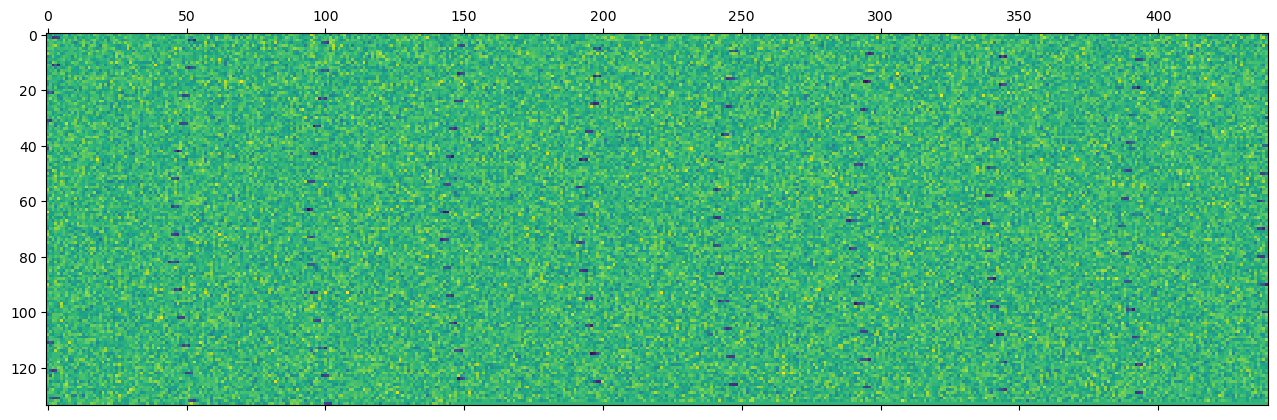

In [10]:
plt.matshow(rd)

In [11]:
# a = np.arange(10)
# bins = np.arange(10+1, stepa=2)
# print(a, bins)
# stats, edge, number = sp.stats.binned_statistic(a, a, bins=bins)
# print(stats.shape, edge.shape)
# print(edge[:-1]+np.diff(edge).mean()/2)

In [12]:
bin_sp_time, bin_sp_flux,  *rd_shape  = bin_sp(time, flux, period, fill_between=1)

NameError: name 'bin_sp' is not defined

In [ ]:
lim = 10
print(lc.observation_time)
print(binned_time.shape)
print(bin_sp_time.shape)
print(binned_flux.shape)
print(bin_sp_flux.shape)

diff_time = binned_time - bin_sp_time
diff_flux = binned_flux - bin_sp_flux

print(diff_time[np.where(diff_time > 0)])

print(diff_flux[np.where(diff_flux > 0)])


1484
(58960,)
(58960,)
(58960,)
(58960,)
[2.27373675e-13 2.27373675e-13 2.27373675e-13 ... 2.27373675e-13
 2.27373675e-13 2.27373675e-13]
[]


In [ ]:
print(np.sum(bin_sp_flux.reshape(rd_shape)- rd))

nan
